<a href="https://colab.research.google.com/github/mohamedbakrey12/Full_Project/blob/main/Word_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load model for Gensim

In [1]:
import gensim.downloader as api

# Load pre-trained Word2Vec model (Google News, 300 dimensions)
word2vec_model = api.load("word2vec-google-news-300")

# Find similar words
similar_words = word2vec_model.most_similar("king", topn=5)
print(similar_words)


[==================================================] 100.0% 1662.8/1662.8MB downloaded
[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474)]


# Visualizing Word Embeddings using PCA

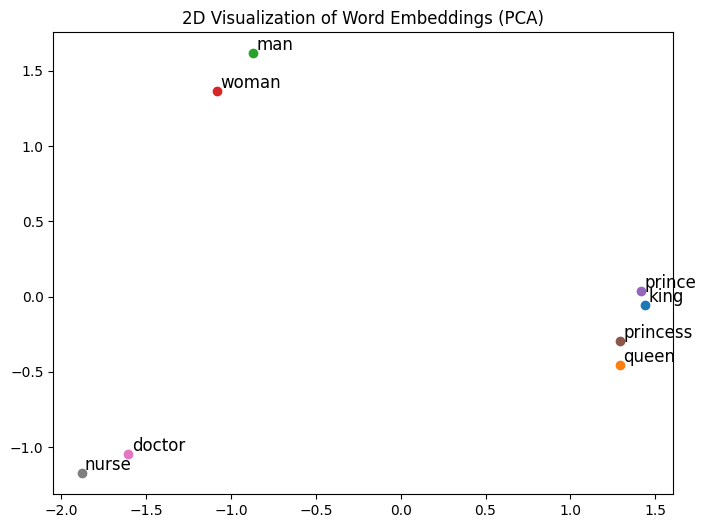

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Select words to visualize
words = ["king", "queen", "man", "woman", "prince", "princess", "doctor", "nurse"]
vectors = [word2vec_model[word] for word in words]

# Reduce dimensionality to 2D
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plot the words
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)

plt.title("2D Visualization of Word Embeddings (PCA)")
plt.show()


# Using FastText for Out-of-Vocabulary (OOV) Words



In [3]:
from gensim.models import FastText

# Train a simple FastText model
sentences = [["deep", "learning", "is", "amazing"], ["word", "embeddings", "are", "powerful"]]
fasttext_model = FastText(sentences, vector_size=10, window=3, min_count=1, epochs=10)

# Get vector for a known word
print(fasttext_model.wv["learning"])

# Get vector for an unseen word (misspelled)
print(fasttext_model.wv["learninng"])  # Still generates a vector!


[-0.01377154  0.00278542 -0.00963151 -0.0090758   0.01179656  0.00897585
 -0.00602262 -0.00342223 -0.01249409 -0.00126856]
[-0.00823275  0.00492565 -0.00760747 -0.00291747  0.00260949  0.01188919
 -0.01097023 -0.00056331 -0.01065377  0.00804605]


# Using BERT to Generate Contextual Word Embeddings

In [4]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Encode a sentence
sentence = "The bank is located near the river."
tokens = tokenizer(sentence, return_tensors="pt")

# Get word embeddings from BERT
with torch.no_grad():
    output = model(**tokens)

# Get the embedding for the word 'bank'
bank_embedding = output.last_hidden_state[0][1]  # 'bank' token index

print(bank_embedding.shape)  # Output: torch.Size([768])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

torch.Size([768])
